# **Week 7 Class Assignment**
### **0706022310044 - Heidy Mudita Sutedjo**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

## **Data Understanding, Cleaning, Visualizations**

In [43]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Based on the `df.info()` and `df.describe()` outputs:

**`df.info()` Interpretation:**

*   The dataset contains 200 entries, with no missing values in any of the columns.
*   There are 5 columns: `CustomerID`, `Gender`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`.
*   `CustomerID`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` are of integer data type (`int64`).
*   `Gender` is of object data type, indicating it contains strings (Male/Female).

**`df.describe()` Interpretation:**

*   **CustomerID:** This is just an identifier and not relevant for analysis.
*   **Age:** The average age of customers is around 38.85 years. The ages range from 18 to 70, with a standard deviation of about 13.97, suggesting a moderate spread in age.
*   **Annual Income (k$)**: The average annual income is about 60.56 thousand dollars. Incomes range from 15k to 137k, with a standard deviation of about 26.26.
*   **Spending Score (1-100)**: The average spending score is around 50.2. The scores range from 1 to 99, with a standard deviation of about 25.82, indicating a significant variation in spending habits among customers.

In [46]:
# rename the Annual Income (k$)	and Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
#Dropping identifier
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [48]:
# Encode Gender column
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


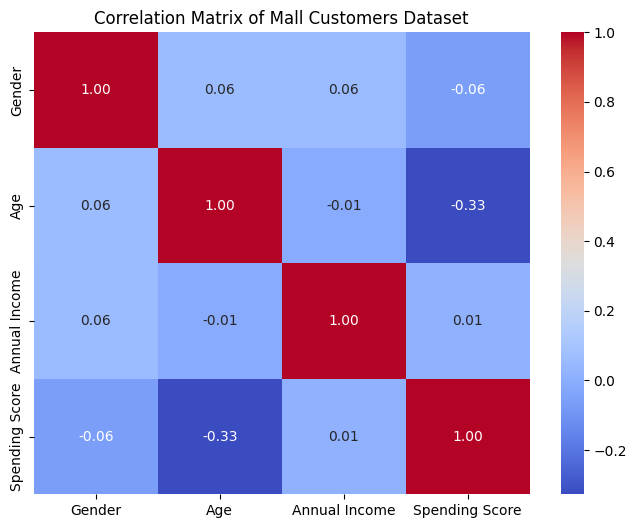

In [49]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mall Customers Dataset')
plt.show()

**Interpretation of the Heatmap:**

The heatmap shows the pairwise correlation coefficients between the numerical columns in the dataset (`Gender`, `Age`, `Annual Income`, and `Spending Score`).

The heatmap is useful for identifying pairs of variables that might have a significant linear relationship.

In this specific heatmap, the correlations between the variables are relatively low, with the highest absolute correlation being between 'Age' and 'Spending Score' (around 0.33). This suggests there isn't a strong linear relationship between any of the pairs of variables in this dataset based on the correlation coefficient alone. However, scatter plots can still be valuable for identifying potential clusters or other non-linear patterns.

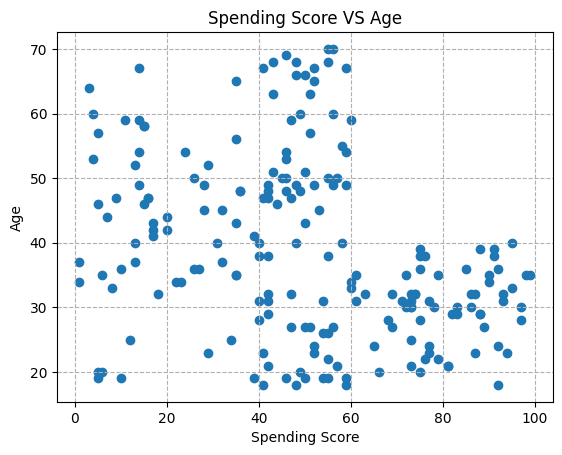

In [50]:
plt.scatter(df['Spending Score'], df['Age'])
plt.title('Spending Score VS Age')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

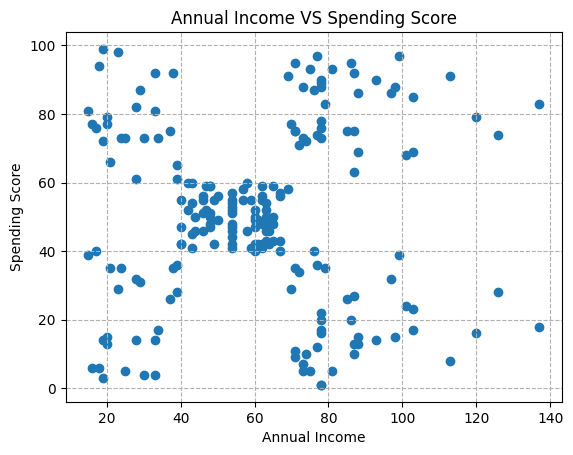

In [51]:
plt.scatter(df['Annual Income'], df['Spending Score'])
plt.title('Annual Income VS Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

**Interpretation of Scatter Plots and Potential Clustering:**

**Age vs Spending Score:**

The scatter plot of Age vs Spending Score shows a less clear clustering pattern compared to the income and spending score plot. However, we can observe some general trends:

*   There seems to be a concentration of customers in the younger age range (20s and 30s) with a wider range of spending scores.
*   As age increases, the spread of spending scores appears to decrease, with older customers (50s and above) tending to have lower to mid-range spending scores.
*   There might be a slight indication of a cluster of younger customers with high spending scores and older customers with lower spending scores, but the boundaries are not as well-defined as in the income vs spending score plot.

While Age might play a role in customer behavior, it doesn't appear to form as distinct and actionable clusters as the combination of Annual Income and Spending Score.

**Annual Income vs Spending Score:**

This scatter plot clearly shows distinct groupings of customers based on their Annual Income and Spending Score. We can visually identify at least five potential clusters:

*   **Cluster 1 (Bottom Left):** Customers with low annual income and low spending scores. These could be considered "frugal" customers.
*   **Cluster 2 (Bottom Right):** Customers with high annual income but low spending scores. These might be "careful spenders" or those who spend their money elsewhere.
*   **Cluster 3 (Center):** A large, dense cluster of customers with average annual income and average spending scores. This represents the "average" customer group.
*   **Cluster 4 (Top Right):** Customers with high annual income and high spending scores. These are likely the "spenders" or "premium" customers.
*   **Cluster 5 (Top Left):** Customers with low annual income but high spending scores. These could be "impulsive" or "budget-conscious but high-spending" customers.

These visually apparent clusters suggest that Annual Income and Spending Score are good features for segmenting customers.

Overall, the scatter plot of Annual Income vs Spending Score is particularly insightful for identifying potential customer segments, and clustering algorithms like K-Means would likely be effective in formalizing these groups.

## **Data Transformation**

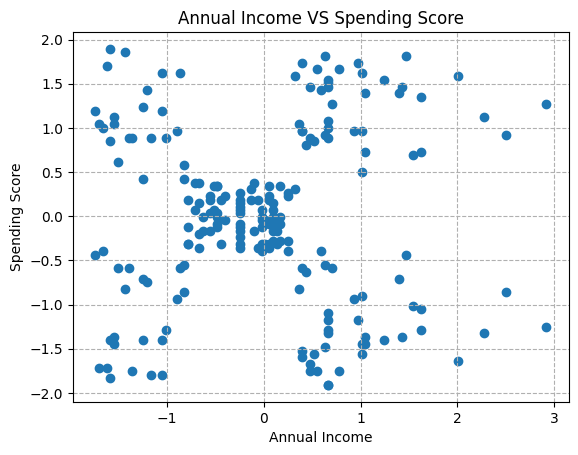

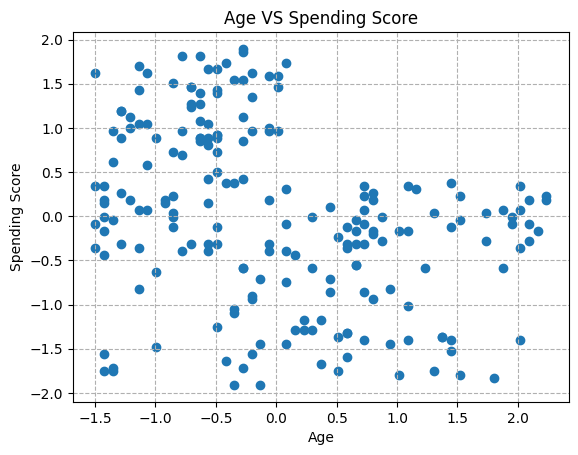

In [52]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale
features_to_scale = ['Age', 'Annual Income', 'Spending Score']
df_to_scale = df[features_to_scale]

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the scaler to the data and transform the data
df_scaled = pd.DataFrame(sc.fit_transform(df_to_scale), columns=features_to_scale)

# visualizations of scaled data
plt.scatter(df_scaled['Annual Income'], df_scaled['Spending Score'])
plt.title('Annual Income VS Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

plt.scatter(df_scaled['Age'], df_scaled['Spending Score'])
plt.title('Age VS Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

After standard scaling, the scatter plots show the same relative patterns as the original data, but the scales of the axes are now comparable (centered around 0). This makes the distance between data points in different dimensions more meaningful for algorithms that rely on distance calculations.

**Why Scaling is Needed for Distance-Based Methods:**

Distance-based machine learning algorithms, such as K-Means clustering, K-Nearest Neighbors (KNN), and Support Vector Machines (SVMs) with certain kernels, calculate the distance between data points to group them or make predictions.

Features with different proportions in dataset can lead to biased results where the algorithm is heavily influenced by features with larger magnitudes, even if they are not the most important features for the task.

Scaling standardizes the range or distribution of the features, ensuring that each feature contributes more equally to the distance calculations. This helps these algorithms to perform better and produce more accurate results. Standard Scaling, in particular, makes the variance of each feature equal to 1, which is beneficial for algorithms like K-Means that assume spherical clusters.

## **Choosing K**

In [53]:
from sklearn.cluster import KMeans

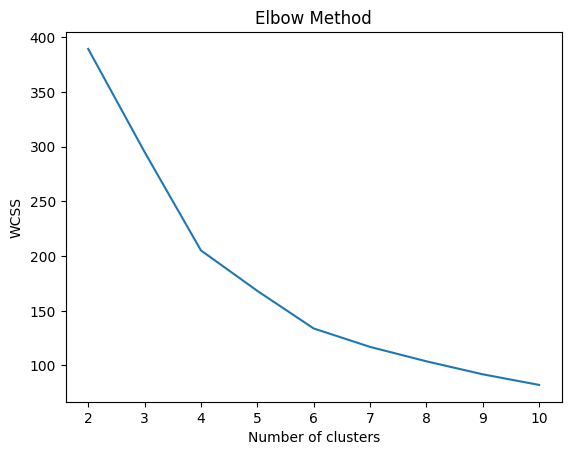

In [54]:
wcss = []
for i in range(2, 11):   #clusters 2-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  389.386189
1                   3  295.212246
2                   4  205.225147
3                   5  168.247580
4                   6  133.868334
5                   7  117.011555
6                   8  103.828578
7                   9   91.956839
8                  10   82.245745


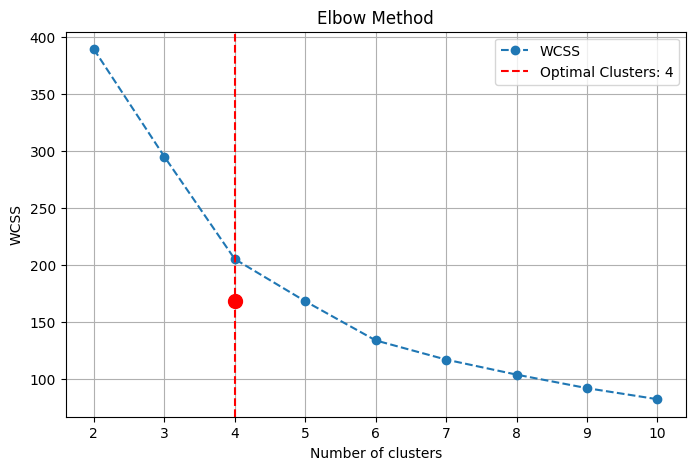

The optimal number of clusters is: 4


In [56]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

**Conclusion on Optimal Number of Clusters (K)**

In the elbow method plot generated, we can visually observe a bend or "elbow" in the curve. The `KneeLocator` algorithm automatically identified this elbow point at **4**. This suggests that clustering the data into 4 groups provides a good balance between minimizing the within-cluster variation and the number of clusters. Therefore, based on the elbow method, the optimal number of clusters (K) to use for K-Means clustering on this dataset is **4**.

## **Modeling with K-Means**

In [57]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Annual Income,Spending Score,KMeans_Cluster
0,1,19,15,39,3
1,1,21,15,81,2
2,0,20,16,6,3
3,0,23,16,77,2
4,0,31,17,40,3


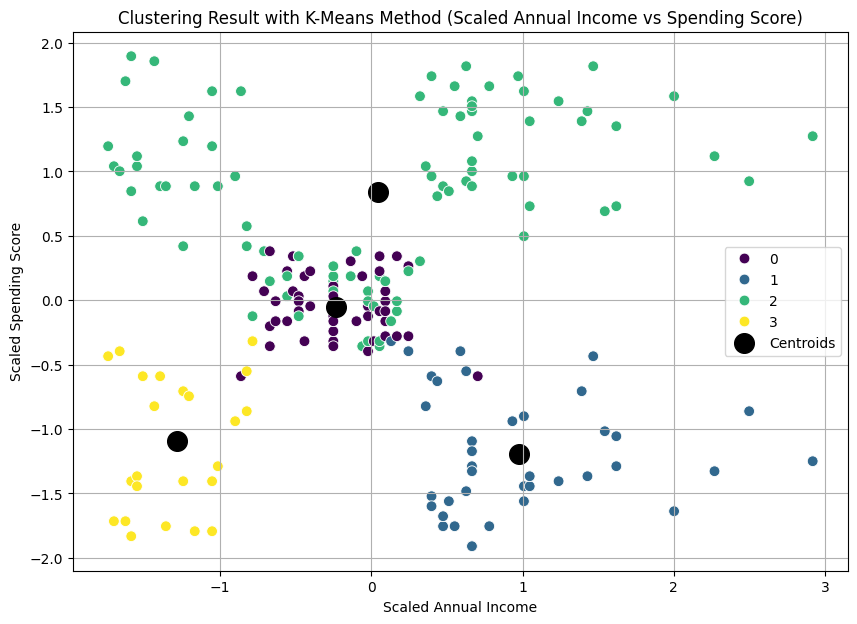

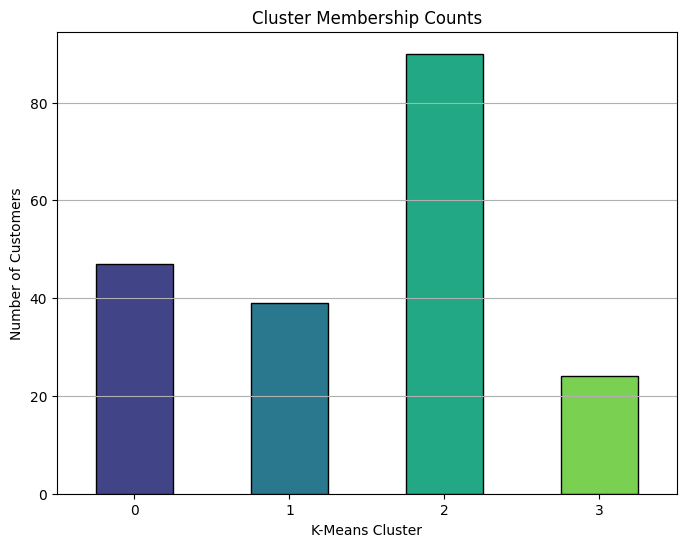

In [58]:
# Visualize clusters based on Scaled Annual Income and Scaled Spending Score (Scaled Data)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled['Annual Income'], y=df_scaled['Spending Score'], hue=df['KMeans_Cluster'], palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c="black", label="Centroids") # Centroids for Income and Spending Score
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Annual Income vs Spending Score)")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the count of customers in each cluster
cluster_counts = df['KMeans_Cluster'].value_counts().sort_index() # Sort by index to match cluster order
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=sns.color_palette('viridis', len(cluster_counts)), edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Based on the K-Means clustering and visualizations above, we can interpret:

*   **Cluster 0:**
    *   **Characteristics:** Relatively older customers (mean Age ~55.6), with average annual income (~54.4k) and average spending scores (~48.9).
    *   **Interpretation:** This segment appears to be a group of older, more established customers with moderate income and spending habits. They could be targeted with promotions for stable or value-oriented products/services.
    *   **Count:** This cluster has 47 customers.

*   **Cluster 1:**
    *   **Characteristics:** Customers with high annual income (--86.1k) but low spending scores (--19.4). They have an average age around 39.9.
    *   **Interpretation:** This segment represents high-income customers who are low spenders at this mall. They might be spending their money elsewhere or are more cautious with their spending. Strategies could focus on understanding their needs and potentially offering exclusive or high-value products to encourage spending.
    *   **Count:** This cluster has 39 customers.

*   **Cluster 2:**
    *   **Characteristics:** This is the largest cluster, with customers having average annual income (--61.7k) and high spending scores (--71.8). Their average age is around 28.5, making them the youngest group.
    *   **Interpretation:** This segment consists of younger customers with average income but high spending scores. They are likely impulsive buyers or highly engaged with the mall's offerings. They could be targeted with trendy products, loyalty programs, and experiential marketing.
    *   **Count:** This cluster has 90 customers.

*   **Cluster 3:**
    *   **Characteristics:** Customers with low annual income (--27.0k) and low spending scores (--22.1). Their average age is around 43.1.
    *   **Interpretation:** This segment includes older customers with low income and low spending scores. They might be budget-conscious or infrequent visitors. Strategies could involve value promotions, discounts, or focusing on essential goods.
    *   **Count:** This cluster has 24 customers.

## **Cluster Profiling & Insights**

In [59]:
# Group the data by cluster and calculate summary statistics
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Annual Income': ['mean', 'median', 'min', 'max'],
    'Spending Score': ['mean', 'median', 'min', 'max'],
    'Gender': [lambda x: x.mode()[0] if not x.mode().empty else 'N/A'] # Calculate mode for Gender
})

# Rename the Gender mode column for clarity
cluster_summary.rename(columns={'<lambda_0>': 'mode'}, level=1, inplace=True)

# Add a count of customers in each cluster
cluster_summary[('Customer Count', '')] = df['KMeans_Cluster'].value_counts().sort_index()

# Flatten the multi-level columns for better readability
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

# Rename the Gender mode column to be more descriptive
cluster_summary.rename(columns={'Gender_mode': 'Gender_Mode (1=Male, 0=Female)'}, inplace=True)


display(cluster_summary)

,Age_mean,Age_median,Age_min,Age_max,Annual Income_mean,Annual Income_median,Annual Income_min,Annual Income_max,Spending Score_mean,Spending Score_median,Spending Score_min,Spending Score_max,Gender_<lambda>,Customer Count_
KMeans_Cluster,,,,,,,,,,,,,,
0,55.638298,54.0,40,70,54.382979,54.0,38,79,48.851064,48.0,35,60,0,47
1,39.871795,41.0,19,59,86.102564,78.0,64,137,19.358974,17.0,1,42,1,39
2,28.500000,29.5,18,40,61.677778,62.5,15,137,71.766667,73.5,41,99,0,90
3,43.125000,43.5,19,67,26.958333,26.5,15,40,22.083333,21.5,3,42,0,24


### Cluster Profiling & Managerial Implications

Based on the K-Means clustering results and the cluster summary table, we can define the following customer segments:

**Cluster 0: The Established Savers**

*   **Profile:**
    *   Predominantly Female (Mode: 0).
    *   Oldest group (Mean Age: ~55.6 years).
    *   Average Annual Income (~$54.4k).
    *   Average Spending Score (~48.9).
*   **Implications:**
    *   **Targeting:** Focus on value, reliability, and products/services relevant to an older demographic.
    *   **Campaign Channels:** Traditional media, direct mail, and potentially online channels favored by older adults.
    *   **Pricing/Offer Design:** Value bundles, loyalty discounts, and promotions on essential goods.
    *   **Retention Ideas:** Build trust through excellent customer service and emphasize long-term benefits.

**Cluster 1: The High-Income Low-Spenders**

*   **Profile:**
    *   Predominantly Male (Mode: 1).
    *   Mid-age range (Mean Age: ~39.9 years).
    *   Highest Annual Income (~$86.1k).
    *   Lowest Spending Score (~19.4).
*   **Implications:**
    *   **Targeting:** Understand reasons for low spending despite high income; potentially target with high-value or luxury items they might purchase elsewhere.
    *   **Campaign Channels:** Exclusive events, personalized offers, and channels associated with luxury or high-income individuals.
    *   **Pricing/Offer Design:** Focus on quality, exclusivity, and the value proposition of higher-priced goods.
    *   **Retention Ideas:** Loyalty programs with exclusive perks, personalized recommendations, and focus on building a relationship beyond just transactions.

**Cluster 2: The Young High-Spenders**

*   **Profile:**
    *   Predominantly Female (Mode: 0).
    *   Youngest group (Mean Age: ~28.5 years).
    *   Average Annual Income (~$61.7k).
    *   Highest Spending Score (~71.8).
*   **Implications:**
    *   **Targeting:** Focus on trendy products, experiences, and impulse purchases.
    *   **Campaign Channels:** Social media, influencers, mobile marketing, and in-store experiences.
    *   **Pricing/Offer Design:** Promotions on new arrivals, loyalty points for frequent purchases, and gamified discounts.
    *   **Retention Ideas:** Build engagement through social media presence, loyalty programs with experiential rewards, and early access to new products.

**Cluster 3: The Budget-Conscious**

*   **Profile:**
    *   Predominantly Female (Mode: 0).
    *   Mid-age range (Mean Age: ~43.1 years).
    *   Lowest Annual Income (~$27.0k).
    *   Low Spending Score (~22.1).
*   **Implications:**
    *   **Targeting:** Focus on essential goods and value-for-money products.
    *   **Campaign Channels:** Flyers, local advertisements, and promotions highlighting discounts and savings.
    *   **Pricing/Offer Design:** Deep discounts, bulk buy options, and loyalty programs focused on saving money.
    *   **Retention Ideas:** Emphasize affordability and provide value through consistent low prices and practical product offerings.